<a href="https://colab.research.google.com/github/carolinehagood/wrangling/blob/main/Lab01api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Practice writing queries using the saferproducts.gov API and your web browser.

In [ ]:
url = 'https://www.saferproducts.gov/RestWebServices/Recall'
query = '?format=json&ProductType=car'

2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.



In [ ]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Exercise' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
df['RemedyOptions'].value_counts()


,count
RemedyOptions,
[],66
[{'Option': 'Repair'}],9
[{'Option': 'Replace'}],8
[{'Option': 'Refund'}],5
"[{'Option': 'Replace'}, {'Option': 'Refund'}]",1
"[{'Option': 'Refund'}, {'Option': 'Repair'}]",1
"[{'Option': 'New Instructions'}, {'Option': 'Repair'}]",1


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
def flat_dictionaries(df, column, key_name):
   clean_values = []
   for i in range(len(df[column])):
    if len(df[column][i]) > 0:
      values = []
      for j in range(len(df[column][i])):
        values.append(df[column][i][j][key_name])
        clean_values.append(values)
      else:
        clean_values.append('')
    df[f'{column}_flattened'] = clean_values
    return df


    df = flat_dictionaries(df, 'RemedyOptions', 'Option')


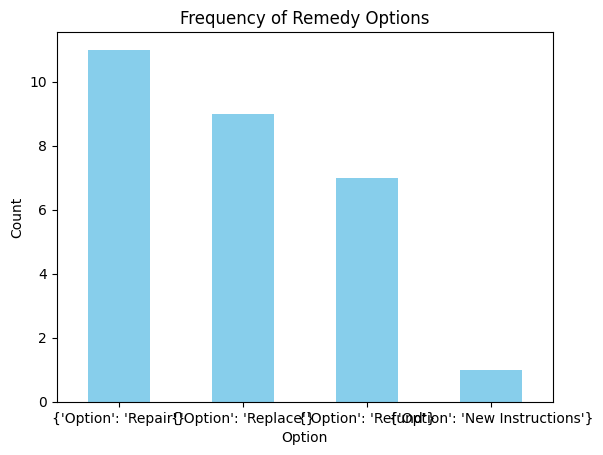

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

all_options = []

for options in df['RemedyOptions']:
    if isinstance(options, list):
        all_options.extend(options)
option_counts = pd.Series(all_options).value_counts()

option_counts = pd.Series(all_options).value_counts()

option_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Remedy Options')
plt.xlabel('Option')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.

I chose this api https://catalog.data.gov/dataset/electricity-data-and-statistics-application-programming-interface-api

In [5]:
import numpy as np
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt
url = 'https://www.eia.gov/beta/api/qb.cfm?'
api_key = 'bFGz5QZipMzmJ90EdZRoqpTxsPpsbVbXu8UDaD2z'

query = f'api_key={api_key}&category_id=0'
api_url = url + query
response = urllib.request.urlopen(api_url)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()



b'<!doctype html>\r\n<html>\r\n\r\n<head>\r\n\t<title>\r\n\t\tOpendata -\r\n\t\tU.S. Energy Information Administration (EIA)\t</title>\r\n\t<meta property="og:title" content="Opendata - U.S. Energy Information Administration (EIA)">\r\n\t<meta property="og:url" content="https://www.eia.gov/opendata/index.php">\r\n\t<meta name="url" content="https://www.eia.gov/opendata/index.php">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" />\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta http-equiv="Content-Language" content="en-us" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta name="robots" content="all" />\r\n<meta name="agency" content="EIA - Energy Information Administration" />\r\n<meta name="subject" content="official energy statistics, data, analysis and forecasting" />\r\n<meta name="Description" content="Energy Information Administration - EIA - Official Energy Statistic

I had trouble loading the data from this api because the data is not in json format, it is in HTML format, which I didn't know the line of code to read.